In [1]:
import os
from PIL import Image
import numpy as np
from torchvision import transforms, datasets
import torch
from model import FaceNet
import random
from torch.utils.data import TensorDataset, Dataset
from triplet_dataset import TripletDataset, create_transform
from facenet_pytorch import InceptionResnetV1
import torchsummary

c:\Users\adity\anaconda3\envs\snap-sorter-winenv-py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
facenet = FaceNet(use_default=True)

In [3]:
n_layers = 0
n_layer_params = []
for param in facenet.model.parameters():
    n_layers+=1
    n_layer_params.append(param.numel())

print("No. of trainable layers: ", n_layers)
print("No. of params per trainable layer: ", n_layer_params)

No. of trainable layers:  380
No. of params per trainable layer:  [864, 32, 32, 9216, 32, 32, 18432, 64, 64, 5120, 80, 80, 138240, 192, 192, 442368, 256, 256, 8192, 32, 32, 8192, 32, 32, 9216, 32, 32, 8192, 32, 32, 9216, 32, 32, 9216, 32, 32, 24576, 256, 8192, 32, 32, 8192, 32, 32, 9216, 32, 32, 8192, 32, 32, 9216, 32, 32, 9216, 32, 32, 24576, 256, 8192, 32, 32, 8192, 32, 32, 9216, 32, 32, 8192, 32, 32, 9216, 32, 32, 9216, 32, 32, 24576, 256, 8192, 32, 32, 8192, 32, 32, 9216, 32, 32, 8192, 32, 32, 9216, 32, 32, 9216, 32, 32, 24576, 256, 8192, 32, 32, 8192, 32, 32, 9216, 32, 32, 8192, 32, 32, 9216, 32, 32, 9216, 32, 32, 24576, 256, 884736, 384, 384, 49152, 192, 192, 331776, 192, 192, 442368, 256, 256, 114688, 128, 128, 114688, 128, 128, 114688, 128, 128, 114688, 128, 128, 229376, 896, 114688, 128, 128, 114688, 128, 128, 114688, 128, 128, 114688, 128, 128, 229376, 896, 114688, 128, 128, 114688, 128, 128, 114688, 128, 128, 114688, 128, 128, 229376, 896, 114688, 128, 128, 114688, 128, 128,

In [4]:
_summary = torchsummary.summary(facenet.model, input_size=(3, 128, 128))
print(_summary)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 63, 63]             864
       BatchNorm2d-2           [-1, 32, 63, 63]              64
              ReLU-3           [-1, 32, 63, 63]               0
       BasicConv2d-4           [-1, 32, 63, 63]               0
            Conv2d-5           [-1, 32, 61, 61]           9,216
       BatchNorm2d-6           [-1, 32, 61, 61]              64
              ReLU-7           [-1, 32, 61, 61]               0
       BasicConv2d-8           [-1, 32, 61, 61]               0
            Conv2d-9           [-1, 64, 61, 61]          18,432
      BatchNorm2d-10           [-1, 64, 61, 61]             128
             ReLU-11           [-1, 64, 61, 61]               0
      BasicConv2d-12           [-1, 64, 61, 61]               0
        MaxPool2d-13           [-1, 64, 30, 30]               0
           Conv2d-14           [-1, 80,

In [5]:
rootdir = """C:\\Users\\adity\\crux_projects\\train_val_dataset\\Extracted Faces\\Extracted Faces"""

In [6]:
transform = create_transform(128, 128)

In [7]:
data = datasets.ImageFolder(rootdir, transform=transform)

class_names = data.classes

print(len(class_names))
print(class_names)

1324
['0', '1', '10', '1000', '1001', '1002', '1006', '1007', '101', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1024', '1025', '1026', '1027', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1038', '1039', '104', '1040', '1042', '1043', '1045', '1046', '1047', '1049', '105', '1050', '1051', '1052', '1053', '1055', '1057', '1059', '106', '1060', '1061', '1062', '1063', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1079', '1081', '1082', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '110', '1100', '1101', '1102', '1104', '1105', '1106', '1107', '1108', '1109', '111', '1110', '1111', '1112', '1113', '1114', '1115', '1116', '1117', '1119', '112', '1120', '1122', '1123', '1124', '1125', '1127', '1128', '113', '1130', '1131', '1133', '1135', '1136', '1137', '1138', '1139', '1140'

In [8]:
"""for directory in os.listdir(rootdir):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path).convert('RGB')
            image = transform(image)"""

"for directory in os.listdir(rootdir):\n    for filename in os.listdir(directory):\n        if filename.endswith('.jpg') or filename.endswith('.png'):\n            image_path = os.path.join(directory, filename)\n            image = Image.open(image_path).convert('RGB')\n            image = transform(image)"

In [9]:
"""num_triplets = 10

# Initialize empty lists to store the triplet samples
anchors = [None for _ in range(1324)]
positives = [None for _ in range(1324)]
negatives = [None for _ in range(1324)]

# Iterate over the class folders
for class_idx in range(len(class_names)):
    print(f"Class no: {class_idx}")
    class_folder = os.path.join(rootdir, class_names[class_idx])

    # Get the list of images for the current class
    image_list = data.imgs[data.class_to_idx[class_names[class_idx]]:]

    # Select random samples for the triplets
    for n in range(num_triplets):
        # Randomly select a person (anchor and positive samples will be from this person)
        person_idx = class_idx

        # Randomly select an anchor image from the person's subfolder
        anchor_image_path = random.choice(image_list)[0]
        anchor_image = data.loader(anchor_image_path)

        # Randomly select a positive image from the same person's subfolder
        positive_image_path = random.choice(image_list)[0]
        positive_image = data.loader(positive_image_path)

        # Randomly select a negative person (different from the anchor and positive person)
        negative_person_idx = (person_idx + random.randint(1, len(class_names) - 1)) % len(class_names)

        # Get the list of images for the negative person
        negative_person_folder = os.path.join(rootdir, class_names[negative_person_idx])
        negative_person_image_list = data.imgs[data.class_to_idx[class_names[negative_person_idx]]:]

        # Randomly select a negative image from the negative person's subfolder
        negative_image_path = random.choice(negative_person_image_list)[0]
        negative_image = data.loader(negative_image_path)

        # Append the triplet samples to the respective lists
        anchors[n] = (anchor_image)
        positives[n] = (positive_image)
        negatives[n] = (negative_image)
            
    print(f"{num_triplets} triplets added")
    print()"""

'num_triplets = 10\n\n# Initialize empty lists to store the triplet samples\nanchors = [None for _ in range(1324)]\npositives = [None for _ in range(1324)]\nnegatives = [None for _ in range(1324)]\n\n# Iterate over the class folders\nfor class_idx in range(len(class_names)):\n    print(f"Class no: {class_idx}")\n    class_folder = os.path.join(rootdir, class_names[class_idx])\n\n    # Get the list of images for the current class\n    image_list = data.imgs[data.class_to_idx[class_names[class_idx]]:]\n\n    # Select random samples for the triplets\n    for n in range(num_triplets):\n        # Randomly select a person (anchor and positive samples will be from this person)\n        person_idx = class_idx\n\n        # Randomly select an anchor image from the person\'s subfolder\n        anchor_image_path = random.choice(image_list)[0]\n        anchor_image = data.loader(anchor_image_path)\n\n        # Randomly select a positive image from the same person\'s subfolder\n        positive_imag

In [10]:
anchors = []
positives = []
negatives = [] 

def extract_triplets_from_directory(root_dir, num_triplets_per_person=10):
    anchor_images = []
    positive_images = []
    negative_images = []

    # List sub-folders (each representing a person)
    person_folders = [folder for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))]

    for person_folder in person_folders:
        person_path = os.path.join(root_dir, person_folder)
        person_images = [image for image in os.listdir(person_path) if image.endswith('.jpg') or image.endswith('.png')]

        for _ in range(num_triplets_per_person):
            # Randomly select anchor and positive images from the same person's folder
            anchor_image_name = random.choice(person_images)
            positive_image_name = random.choice(person_images)

            # Randomly select a different person's folder for negative image
            negative_person_folder = random.choice([folder for folder in person_folders if folder != person_folder])
            negative_person_path = os.path.join(root_dir, negative_person_folder)
            negative_person_images = [image for image in os.listdir(negative_person_path) if image.endswith('.jpg') or image.endswith('.png')]
            negative_image_name = random.choice(negative_person_images)

            # Load images as PIL images
            anchor_image = Image.open(os.path.join(person_path, anchor_image_name)).convert('RGB')
            positive_image = Image.open(os.path.join(person_path, positive_image_name)).convert('RGB')
            negative_image = Image.open(os.path.join(negative_person_path, negative_image_name)).convert('RGB')

            anchor_images.append(anchor_image)
            positive_images.append(positive_image)
            negative_images.append(negative_image)

    return anchor_images, positive_images, negative_images


In [11]:
anchors, positives, negatives = extract_triplets_from_directory(root_dir=rootdir, num_triplets_per_person=5)

In [12]:
import matplotlib.pyplot as plot

def print_images(a, p, n, flag):
    # display a  sample of images
    plot.figure(figsize=(15,15))
    for i in range(len(a)):
        plot.subplot(len(a), 3, 1 + i*3)
        plot.imshow(a[i])
        plot.subplot(len(a), 3, 2 + i*3)
        plot.imshow(p[i])
        plot.subplot(len(a), 3, 3 + i*3)
        plot.imshow(n[i])
    if flag == 0:  # briefly display images and continue
        plot.show(block=False)
        plot.pause(3)
        plot.close()
    else:  # wait for user to close window
        plot.show()

<class 'PIL.Image.Image'>


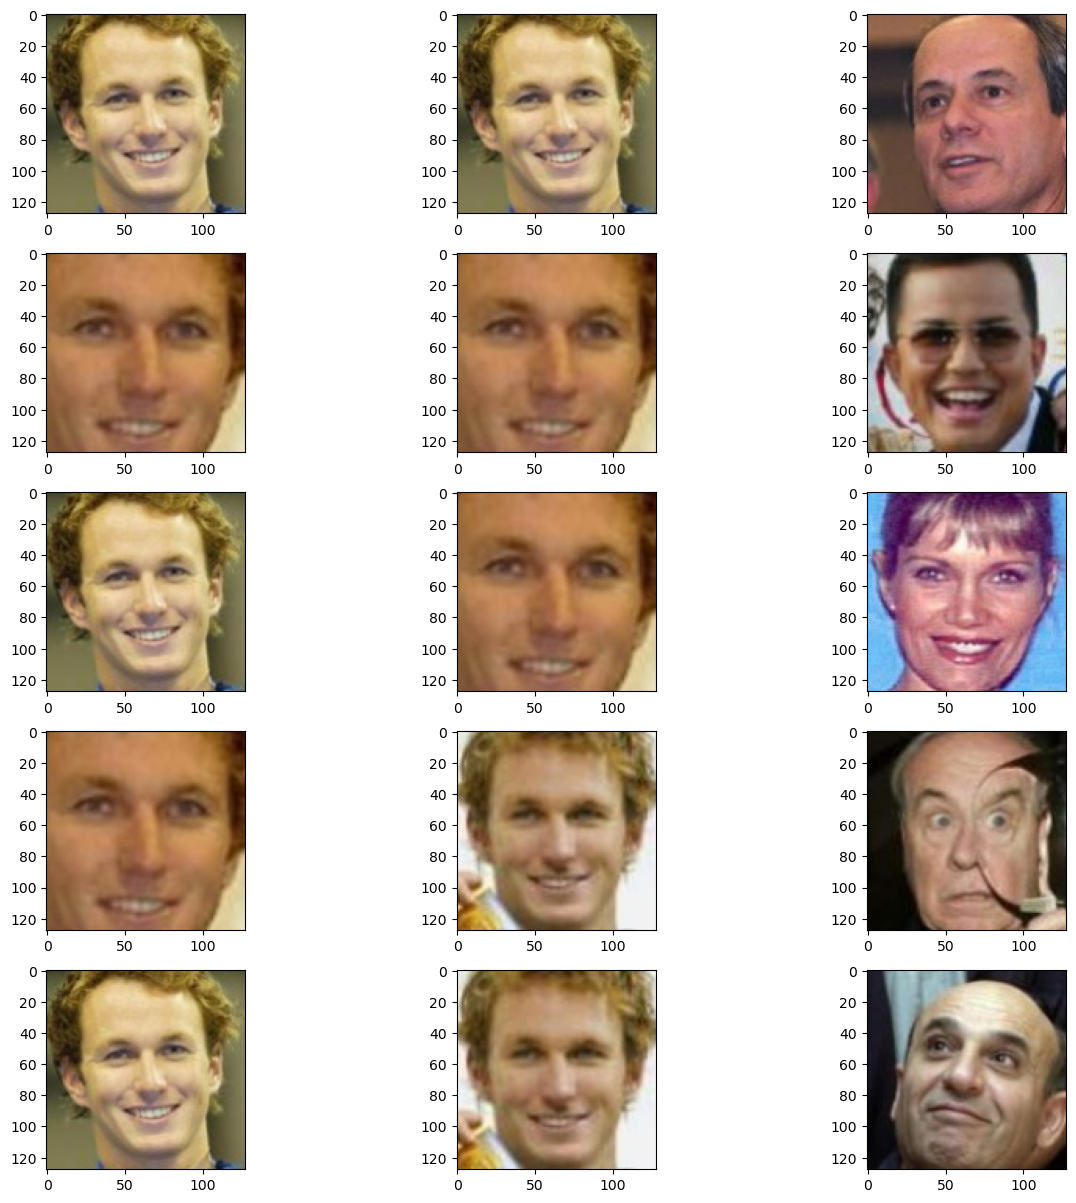

In [13]:
a = anchors[0:5]
p = positives[0:5]
n = negatives[0:5]

print(type(a[0]))

print_images(a, p, n, 0)

In [14]:
train_dataset = TripletDataset(anchors, positives, negatives, transform=transform)

In [15]:
print(len(train_dataset.anchors))

6620


In [16]:
facenet.train(train_data=train_dataset, batch_size=512, n_epochs=5, learning_rate=0.002, frozen=250)

Training starts: Wed Aug 30 15:46:26 2023

Epoch [1/5], Loss: 0.19026956993799943 | 472.97s | Wed Aug 30 15:54:19 2023
Epoch [2/5], Loss: 0.10909424091760929 | 450.25s | Wed Aug 30 16:01:50 2023
Epoch [3/5], Loss: 0.07023564783426431 | 443.03s | Wed Aug 30 16:09:13 2023
Epoch [4/5], Loss: 0.051987192378594324 | 449.93s | Wed Aug 30 16:16:43 2023
Epoch [5/5], Loss: 0.0363563085691287 | 483.64s | Wed Aug 30 16:24:46 2023
Training ends: Wed Aug 30 16:24:46 2023
Time taken: 2299.87s
